<a href="https://colab.research.google.com/github/adrielecaldas-alt/monitoria/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_C%C3%B3pia_de_Aula_Preparacao_transformacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciência de Dados<br> Aula 1: Preparação e transformação dos dados

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons

<hr>

Um dos primeiros passos em Ciência de Dados é a preparação e transformação dos dados, de modo a prepará-los para etapas posteriores.

Nessa aula, vamos considerar dados com elementos duplicados ou faltantes e realizar a sua limpeza. Também vamos considerar métodos básicos de pré-processamento e transformação de dados.

Vamos ler um conjunto de dados com erros:

In [ ]:
# gerador de números aleatórios
import random
random.seed(1) # inicia a semente do gerador de números aleatórios. Importante para reprodução dos resultados
# Pandas is used for data manipulation
import pandas as pd # bibliote Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

# CSV file
data = pd.read_csv('/content/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data

Número de linhas e colunas: (25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


Primeiramente, vamos remover os "NaN" (not a number, que representam valores desconhecidos) do arquivo, apagando as linhas que contém esse problema. Notem que algumas linhas serão removidas, tais como a 5 e 9.

In [ ]:
# remove as linhas com NaN
data = data.dropna()
print(data.shape)
data.head(25)

(22, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada


Vamos remover as linhas duplicadas. Para isso, inicialmente verificamos se há a ocorrência dessas linhas.

In [ ]:
# Retorna True na posição em que há uma linha duplicada
data.duplicated()

,0
0,False
1,True
2,False
3,False
4,True
6,False
7,False
8,True
10,False
11,False


Notem que indicamos nos dados originais, na última coluna, quais linhas estão duplicadas.

Para realizamos a remoção, usamos um método da biblioteca Pandas.

In [ ]:
# Remove as linhas duplicadas
data = data.drop_duplicates()
print(data.shape)
data.head(25)

(17, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa


Compare essa tabela com a original (acima) e verifique se a remoção das linhas foi feita de forma correta. As linhas duplicadas são indicadas na última coluna.

Vamos remover as linhas que contenham "?" ou qualquer outro caracter que indique um erro ou entrada faltante.

Primeiramente, convertemos essas entradas para "NaN":

In [ ]:
import numpy as np
# Substitui Nan por um caracter desejado
data = data.replace('?', np.nan)
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa


A seguir, fazemos a remoção, como anteriormente.

In [ ]:
# Remove as linhas com Nan
data = data.dropna()
print(data.shape)
data.head(25)

(14, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa
16,4.8,3,1.4,0.1,setosa


Desse forma, temos um conjunto de dados sem erros e entradas duplicadas. É fundamental realizar essas operações em qualquer conjunto de dados antes de aplicarmos os métodos de aprendizado de máquina e estatística.

Podemos também remover determinadas linhas e colunas dos dados. Para remover a segunda e quarta colunas:

In [ ]:
#print("Atributos atuais:",data.columns)
print("Colunas removidas:", data.columns[[1, 3]])
# Remove as linhas especificadas
data = data.drop(data.columns[[1, 3]], axis=1)
data.head(25)

Colunas removidas: Index(['sepal_width', 'petal_width'], dtype='object')


,sepal_length,petal_length,species
0,5.1,1.4,duplicada
3,4.7,1.3,setosa
6,5,1.4,setosa
7,5.4,1.7,duplicada
10,5,1.5,setosa
11,4.4,1.4,duplicada
12,4.9,1.5,setosa
13,5.4,1.5,setosa
15,4.8,1.6,setosa
16,4.8,1.4,setosa


Para remover a primeira e terceira linhas:

In [ ]:
data = data.drop(data.index[[0, 2]], axis=0)
print("Linhas Removidas:", data.index[[0, 2]])
data.head(25)

Linhas Removidas: Index([3, 10], dtype='int64')


,sepal_length,petal_length,species
3,4.7,1.3,setosa
7,5.4,1.7,duplicada
10,5,1.5,setosa
11,4.4,1.4,duplicada
12,4.9,1.5,setosa
13,5.4,1.5,setosa
15,4.8,1.6,setosa
16,4.8,1.4,setosa
18,4.3,1.1,setosa
19,5.8,1.2,setosa


## Substituição de valores ausentes

Em muitas siutações, a matriz de atributos pode conter valores ausentes. Nesse caso, podemos usar diferentes métodos para substituir tais valores, como preenche-los com valores médios ou medianas.

Vamos ler os dados novamente:

In [ ]:
data = pd.read_csv('/content/iris-with-errors.csv', header=(0))
print(data.shape)
data.head(25)

(25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


Vamos substituir os valores com 'NaN' e '?' pelos valores médios dos atributos. Primeiramente, mudamos as entradas '?' para 'NaN', como foi feito anteriormente.

In [ ]:
import numpy as np
data = data.replace('?', np.nan)
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


A seguir, inserimos a média de cada atributo nas entradas com valores 'NaN'.

In [ ]:
# convertemos para o formato Numpy e ignoramos a última coluna (classe)
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)
# calculamos a média de cada atributo e armazenamos em um vetor
# Usamos a função nanmean que calcula a média ignorando os Nan
averages = np.nanmean(X, axis = 0) # veja https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmean.html
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            X[i,j] = averages[j] # insere a média
print(averages)
print(X)

[5.02272727 3.4375     1.44       0.22608696]
[[5.1        3.5        1.4        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.1        1.5        0.2       ]
 [5.         3.6        1.4        0.2       ]
 [5.4        3.9        1.7        0.4       ]
 [5.4        3.9        1.7        0.4       ]
 [4.6        3.4        1.4        0.22608696]
 [5.         3.4        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        1.5        0.1       ]
 [5.4        3.7        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.8        3.4        1.6        0.2       ]
 [4.8        3.         1.4        0.1       ]
 [4.4        2.9        1.4        0.2       ]
 [4.3        3.         1.1        0.1       ]
 [5.8        4.         1.2        0.2       ]
 [5.7        4

Assim como inserimos a média, poderíamos inserir a mediana ou qualquer outro valor.

## Normalização e padronização

Vamos ler os dados:

In [ ]:
import pandas as pd
# CSV file
data = pd.read_csv('/content/iris.csv', header=(0))
print(data.shape)
data.head(150)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Para normalizar os dados no intervalo [0,1]:

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# considera somente os atributos, ignorando a última coluna, que contem a classe
X = np.array(data[data.columns[0:data.shape[1]-1]])
for i  in range(X.shape[1]):
    print("Maior valor da coluna:", i, ":", max(X[:,i]))
    print("Menor Valor da coluna:", i, ":", min(X[:,i]))
# prepara a função para transformar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
# Realiza a normalização e coloca em um novo vetor
X_norm = scaler.fit_transform(X)
print(X_norm)

Maior valor da coluna: 0 : 7.9
Menor Valor da coluna: 0 : 4.3
Maior valor da coluna: 1 : 4.4
Menor Valor da coluna: 1 : 2.0
Maior valor da coluna: 2 : 6.9
Menor Valor da coluna: 2 : 1.0
Maior valor da coluna: 3 : 2.5
Menor Valor da coluna: 3 : 0.1
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]


Ou seja, o máximo e mínimo do novo conjunto de dados:

In [ ]:
print('Mínimo dos atributos:', np.amin(X_norm, axis=0))
print('Máximo dos atributos:', np.amax(X_norm, axis=0))

Mínimo dos atributos: [0. 0. 0. 0.]
Máximo dos atributos: [1. 1. 1. 1.]


Para realizarmos a padronização dos dados, de forma que os atributos apresentem média igual a zero e variância igual a 1, o procedimento é parecido.

In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.array(data[data.columns[0:data.shape[1]-1]])
# prepara a função para transformar os dados
scaler = StandardScaler().fit(X)
# realiza a padronização (média=0, variância = 1)
rescaledX = scaler.transform(X)
print(rescaledX)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

Vamos verificar se cada coluna apresenta média igual a zero e desvio padrão igual a um.

In [ ]:
for i in np.arange(0,rescaledX.shape[1]):
    print('Media da coluna', i, 'é igual a: ', np.mean(rescaledX[:,i]))
    print('Desvio padrão da coluna', i, 'é igual a: ', np.std(rescaledX[:,i]),'\n')

Media da coluna 0 é igual a:  -4.736951571734001e-16
Desvio padrão da coluna 0 é igual a:  1.0 

Media da coluna 1 é igual a:  -6.631732200427602e-16
Desvio padrão da coluna 1 é igual a:  0.9999999999999999 

Media da coluna 2 é igual a:  3.315866100213801e-16
Desvio padrão da coluna 2 é igual a:  0.9999999999999998 

Media da coluna 3 é igual a:  -2.842170943040401e-16
Desvio padrão da coluna 3 é igual a:  1.0 



## Binarização dos dados

A binarização dos dados resulta em valores zero ou um, de acordo com um dado limiar. Ou seja, se o valor em X for maior do que o limiar, o valor resultante será 1, caso contrário será zero.
$$
X_{novo}(i,j) =
\begin{cases} 1, & \mbox{se } X(i,j) \geq T \\ 0, & \mbox{se } X(i,j) < T \end{cases}
$$

In [ ]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler

# considera apenas os atributos, ignorando a última coluna das classes
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)
T = 0.2 # valor do limiar
print('Limiar:', T)
print('---------------------')

# prepara a normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
# realiza a normalização
X_pad = scaler.fit_transform(X)
# faz a binarização considerando o limiar (threshold)
binarizer = Binarizer(threshold=T).fit(X_pad)
binaryX = binarizer.transform(X_pad)
for i in np.arange(0,X_pad.shape[0]):
    print("Antes:", X_pad[i,])
    print('Depois:',binaryX[i,])
    print('---------------------')

Limiar: 0.2
---------------------
Antes: [0.22222222 0.625      0.06779661 0.04166667]
Depois: [1. 1. 0. 0.]
---------------------
Antes: [0.16666667 0.41666667 0.06779661 0.04166667]
Depois: [0. 1. 0. 0.]
---------------------
Antes: [0.11111111 0.5        0.05084746 0.04166667]
Depois: [0. 1. 0. 0.]
---------------------
Antes: [0.08333333 0.45833333 0.08474576 0.04166667]
Depois: [0. 1. 0. 0.]
---------------------
Antes: [0.19444444 0.66666667 0.06779661 0.04166667]
Depois: [0. 1. 0. 0.]
---------------------
Antes: [0.30555556 0.79166667 0.11864407 0.125     ]
Depois: [1. 1. 0. 0.]
---------------------
Antes: [0.08333333 0.58333333 0.06779661 0.08333333]
Depois: [0. 1. 0. 0.]
---------------------
Antes: [0.19444444 0.58333333 0.08474576 0.04166667]
Depois: [0. 1. 0. 0.]
---------------------
Antes: [0.02777778 0.375      0.06779661 0.04166667]
Depois: [0. 1. 0. 0.]
---------------------
Antes: [0.16666667 0.45833333 0.08474576 0.        ]
Depois: [0. 1. 0. 0.]
------------------

## Conversão de variáveis nominais em inteiros

Quando temos dados nominais e ordinais, podemos convertê-los para variáveis numéricas. Vamos fazer isso com as classes dos dados, mudando os valores nominais para inteiros.

In [ ]:
# leitura dos dados
data = pd.read_csv('/content/iris.csv', header=(0))
print('Número de linhas e colunas:', data.shape)
# mostramos a última coluna
print('Coluna com as classes:\n', data[data.columns[-1]])

Número de linhas e colunas: (150, 5)
Coluna com as classes:
 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [ ]:
# armazena o nome das classes
classes = np.unique(data[data.columns[-1]])
print('Classes:', classes)
number = 0 # valor que será usado para representar a clases
for i in classes:
    data = data.replace(i, number) # substitui cada valor da classe por number
    number = number + 1
print('Novos dados:')
print(data[data.columns[-1]])

Classes: ['setosa' 'versicolor' 'virginica']
Novos dados:
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


/tmp/ipython-input-3214993269.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(i, number) # substitui cada valor da classe por number


In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Esse mesmo procedimento pode ser usado em qualquer uma das colunas da matriz de atributos.

## One-hot encoding

Quando temos variáveis nominais e precisamos transformá-las para numéricas, uma maneira simples é usar o método one-hot encoding.

In [ ]:
import pandas as pd

# cria um dataframe do Pandas
df = pd.DataFrame({
          'A':['a','b','a', 'c', 'a', 'b'],
        })
df.head()

,A
0,a
1,b
2,a
3,c
4,a


Usando one-hot enconding, obtemos:

In [ ]:
df = pd.get_dummies(df)
df.head()

,A_a,A_b,A_c
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False


Note que foi usado um código binário para cada valor nominal.

## Dados correlacionados

Vamos identificar as colunas em que a correlação entre elas é maior do que $|p|$.

In [ ]:
data = pd.read_csv('/content/BostonHousing.csv', header=(0))
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


A matriz de correlação entre as variáveis:

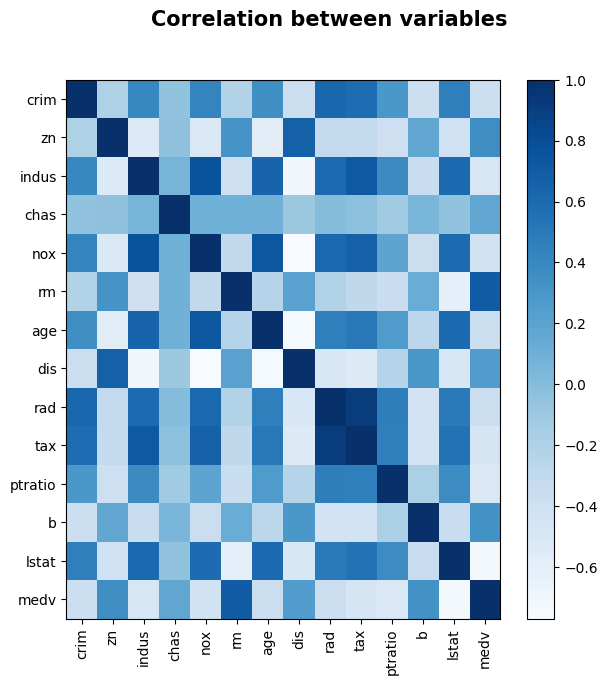

In [ ]:
# obtem a matriz de correlação dos dados
corr = data.corr()
# Mostra a matriz
plt.figure(figsize=(7, 7))
# imshow é usado para mostrar imagens
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
# mostra a barra lateral de cores
plt.colorbar()
# inclui o nome das variáveis
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

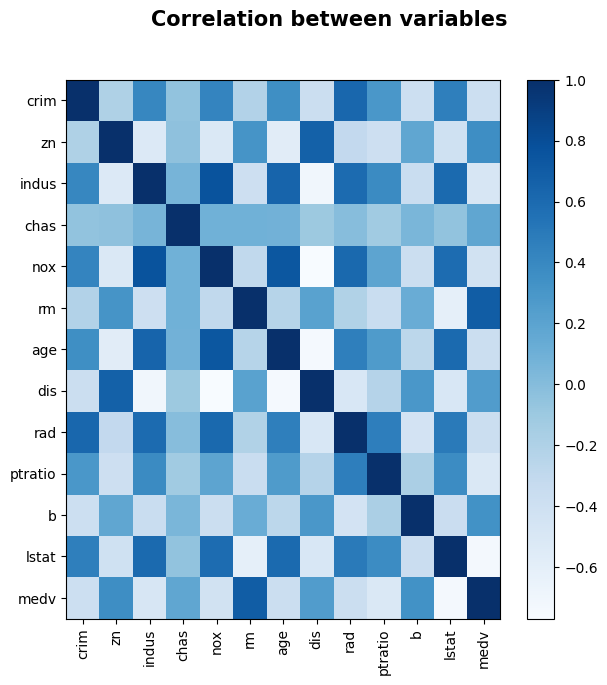

In [ ]:
data = data.drop(data.columns[[9]], axis=1)
# obtem a matriz de correlação dos dados
corr = data.corr()
# Mostra a matriz
plt.figure(figsize=(7, 7))
# imshow é usado para mostrar imagens
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
# mostra a barra lateral de cores
plt.colorbar()
# inclui o nome das variáveis
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Os dados estão armazenados na matriz:

In [ ]:
print(corr)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

Assim, para identificarmos as variáveis correlacionadas, usamos um laço for:

In [ ]:
p = 0.7 # correlação mínima
var = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if np.abs(corr[i][j]) > p: # se maior do que |p|
                var.append([i,j])
print('Variáveis mais correlacionadas:\n', var)

Variáveis mais correlacionadas:
 [['indus', 'nox'], ['indus', 'dis'], ['indus', 'tax'], ['nox', 'indus'], ['nox', 'age'], ['nox', 'dis'], ['age', 'nox'], ['age', 'dis'], ['dis', 'indus'], ['dis', 'nox'], ['dis', 'age'], ['rad', 'tax'], ['tax', 'indus'], ['tax', 'rad'], ['lstat', 'medv'], ['medv', 'lstat']]


Com isso, podemos remover as variáveis mais correlacionadas de modo a reduzir a redundância nos dados.

## Dados desbalanceados

Muitas vezes, o número de observações difere em cada classe, de modo que os dados são desbalanceados. Podemos verificar o número de elementos em cada classe criando um histograma.

In [ ]:
data = pd.read_csv('/content/Vehicle.csv', header=(0))
data.head(10)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


In [ ]:
classes = data[data.columns[-1]]
print(classes)

0       van
1       van
2      saab
3       van
4       bus
       ... 
841    saab
842     van
843    saab
844    saab
845     van
Name: Class, Length: 846, dtype: object


O histograma do número de elementos em cada classe:

In [ ]:
# armazena os nomes das classes
cl = np.unique(classes)
# armazena o número de elementos em cada classe
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
print(ncl)

[218. 212. 217. 199.]


Em um gráfico de barras:

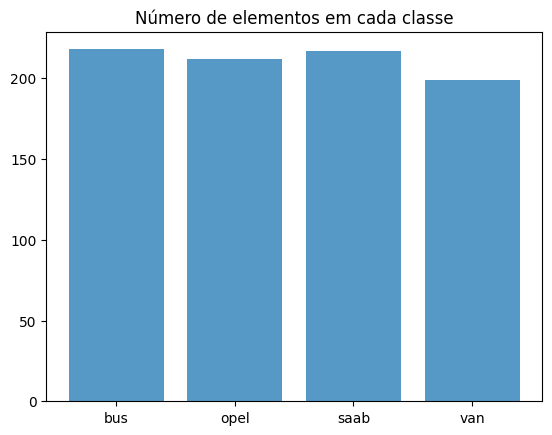

In [ ]:
# número de classes
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
# mostra o nome das classes ao invés dos números
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Podemos redistribuir os dados de modo que cada classes contenha o mesmo número de elementos.

Vamos balancear os dados de forma que cada classe contenha $N$ elementos. Escolhermos $N$ elementos de forma aleatória, sem reposição, de cada classe.

In [ ]:
N = 3
# classes
cl = np.unique(classes)
X = np.array(data)
Xnew = []
cls = np.array(data[data.columns[-1]])
for i in np.arange(0, len(cl)):
    a = np.argwhere(cls == cl[i])
    # seleciona os índices nos dados de forma aleatória
    inds = np.random.choice(a[:,0],N,replace=False)
    Xnew.append(X[inds,:])
Xnew = np.array(Xnew)
print('Dados obtidos a partir da amostragem')
print(Xnew)

Dados obtidos a partir da amostragem
[[[85 43 64 128 56 8 150 46 19 144 168 324 173 82 9 14 180 184 'bus']
  [101 42 62 175 67 6 149 43 19 139 169 341 165 65 7 11 202 209 'bus']
  [81 43 68 139 62 7 149 46 19 145 172 323 171 83 1 14 180 184 'bus']]

 [[82 38 53 125 59 5 133 51 18 128 152 259 146 87 0 0 177 183 'opel']
  [89 36 72 141 56 7 138 48 18 126 163 286 130 72 1 1 187 192 'opel']
  [89 40 69 147 58 6 132 50 18 137 155 260 151 61 16 6 203 209 'opel']]

 [[103 51 105 174 56 11 210 32 24 163 222 650 222 73 8 9 187 196 'saab']
  [109 52 104 199 60 12 215 31 24 162 220 691 212 67 11 7 189 199 'saab']
  [96 50 94 215 67 9 187 35 22 158 214 525 214 67 8 6 193 201 'saab']]

 [[96 39 77 160 62 8 140 47 18 150 161 294 124 62 15 3 201 208 'van']
  [88 37 51 105 52 5 119 57 17 128 135 207 125 86 8 16 179 183 'van']
  [89 47 85 147 58 10 153 44 19 151 175 349 186 74 13 7 186 197 'van']]]


## Outliers - Box plot

Em muitos casos, temos a presença de outliers nos dados. Uma maneira simples de identificar outliers é criando um boxplot.

Lembrem-se, um boxplot:

<img src="https://cdn-images-1.medium.com/max/1600/1*2c21SkzJMf3frPXPAR_gZA.png" style="height:300px">

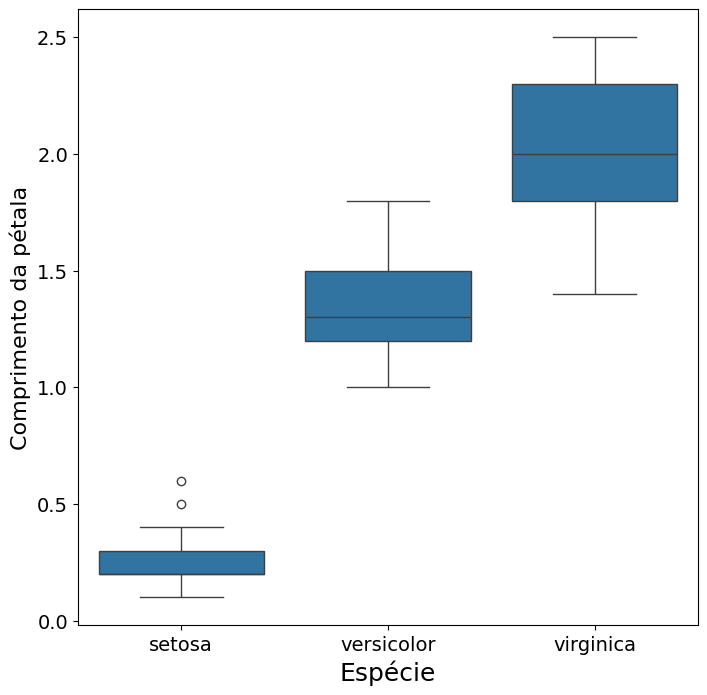

In [ ]:
# biblioteca para mostrar os gráficos
import seaborn as sns
data = pd.read_csv('/content/iris.csv', header=(0))
plt.figure(figsize=(8, 8))
# mostra o boxplot
sns.boxplot(x="species", y="petal_width", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

Podemos ainda usar a distância interquantil (Q3 - Q1) para encontrar os outliers de uma forma simples. Vamos considerar um exemplo.

In [ ]:
np.random.seed(101)
# geramos os dados de forma aleatória e colocamos em um dataframe
data = pd.DataFrame({'a': np.random.randint(1, 200, 20),
                          'b': np.random.randint(1, 200, 20),
                          'c': np.random.randint(1, 200, 20)})

# geramos os outliers, aumentando em 10 vezes o valor dos atributos
data[data > 150] = data[data > 150]*10
# mostramos os dados
print (data)

       a     b     c
0     96   112   100
1     12   137    29
2     82   116    64
3     71  1580     8
4     64   116   139
5     88    60  1810
6     76  1630  1850
7    138    45   104
8     41    73    39
9    133    20    74
10    64   127  1810
11  1690   139   147
12    61    77    72
13  1930   108   104
14   111    88   144
15     6   129    45
16   141   106     1
17    41     9   117
18    50    63   107
19    84  1650   141


Visualizando os dados:

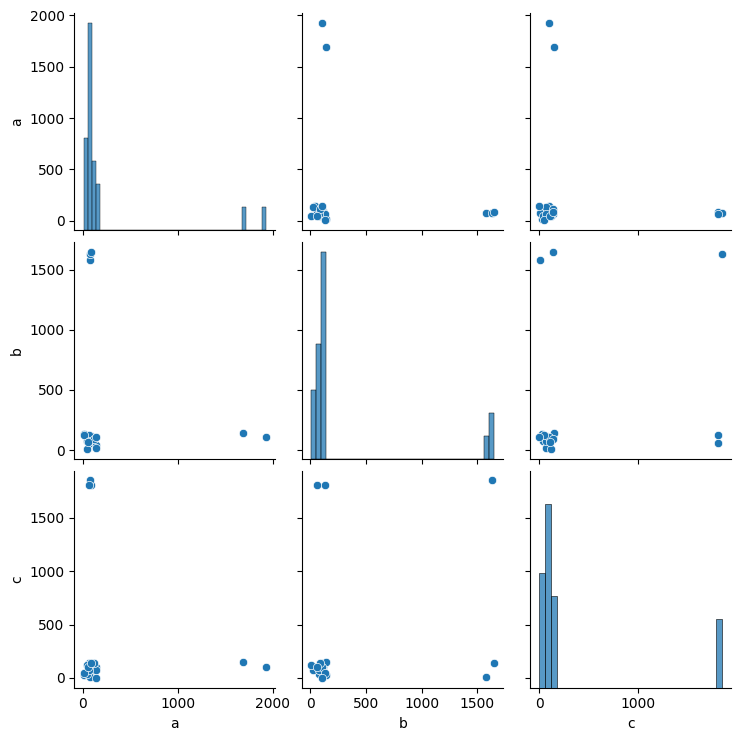

In [ ]:
import seaborn as sns
sns.pairplot(data)
plt.show()

Para encontrarmos os outliers:

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

print (((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))))

        a      b      c
0   False  False  False
1   False  False  False
2   False  False  False
3   False   True  False
4   False  False  False
5   False  False   True
6   False   True   True
7   False  False  False
8   False  False  False
9   False  False  False
10  False  False   True
11   True  False  False
12  False  False  False
13   True  False  False
14  False  False  False
15  False  False  False
16  False  False  False
17  False  False  False
18  False  False  False
19  False   True  False


Podemos dizer que uma observação é um outlier se ao menos uma das variáveis está fora dos limites máximos do boxplot. Ou seja, se o valor é menor do que (Q1 - 1.5 * IQR) ou maior do que (Q3 + 1.5 * IQR).
Outliers são indicados como True abaixo.

In [ ]:
print (((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1))#~is used to invert the answer

0     False
1     False
2     False
3      True
4     False
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19     True
dtype: bool


A partir dessa informação, podemos fazer a retirada dos outliers no dados originais.

In [ ]:
v = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
#v = np.invert(v)
data = data.drop(data.index[list(v)], axis=0)
data.head(25)

,a,b,c
0,96,112,100
1,12,137,29
2,82,116,64
4,64,116,139
7,138,45,104
8,41,73,39
9,133,20,74
12,61,77,72
14,111,88,144
15,6,129,45


## Exercícios de fixação

1 - Leia os dados com erro novamente(iris with error), faça a limpeza e remova as duas últimas colunas.

In [ ]:
# gerador de números aleatórios
import random
random.seed(1) # inicia a semente do gerador de números aleatórios. Importante para reprodução dos resultados
# Pandas is used for data manipulation
import pandas as pd # bibliote Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

# CSV file
data = pd.read_csv('/content/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data

Número de linhas e colunas: (25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [ ]:
# remove as linhas com NaN
data = data.dropna()
print(data.shape)
data.head(25)

(22, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada


In [ ]:
# Retorna True na posição em que há uma linha duplicada
data.duplicated()

,0
0,False
1,True
2,False
3,False
4,True
6,False
7,False
8,True
10,False
11,False


In [ ]:
# Remove as linhas duplicadas
data = data.drop_duplicates()
print(data.shape)
data.head(25)

(17, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa


In [ ]:
import numpy as np
# Substitui Nan por um caracter desejado
data = data.replace('?', np.nan)
data.head(25)

NameError: name 'data' is not defined

In [ ]:
# Remove as linhas com Nan
data = data.dropna()
print(data.shape)
data.head(25)

(14, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa
16,4.8,3,1.4,0.1,setosa


In [ ]:
#print("Atributos atuais:",data.columns)
print("Colunas removidas:", data.columns[[-1, -2]])
# Remove as linhas especificadas
data = data.drop(data.columns[[-1, -2]], axis=1)
data.head(25)

Colunas removidas: Index(['species', 'petal_width'], dtype='object')


,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5
11,4.4,2.9,1.4
12,4.9,3.1,1.5
13,5.4,3.7,1.5
15,4.8,3.4,1.6
16,4.8,3,1.4


2 - Leia os dados com erro novamente(iris with error) e insira a mediana de cada atributo onde for encontrada NaN.

In [ ]:
data = pd.read_csv('/content/iris-with-errors.csv', header=(0))
print(data.shape)
data.head(25)

(25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [ ]:
import numpy as np
data = data.replace('?', np.nan)
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [ ]:
# convertemos para o formato Numpy e ignoramos a última coluna (classe)
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)
# calculamos a média de cada atributo e armazenamos em um vetor
# Usamos a função nanmedian que calcula a média ignorando os Nan
averages = np.nanmedian(X, axis = 0) # veja https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmean.html
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            X[i,j] = averages[j] # insere a média
print(averages)
print(X)

[5.05 3.45 1.4  0.2 ]
[[5.1  3.5  1.4  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.   1.4  0.2 ]
 [4.7  3.2  1.3  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.1  1.5  0.2 ]
 [5.   3.6  1.4  0.2 ]
 [5.4  3.9  1.7  0.4 ]
 [5.4  3.9  1.7  0.4 ]
 [4.6  3.4  1.4  0.2 ]
 [5.   3.4  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.9  3.1  1.5  0.1 ]
 [5.4  3.7  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.8  3.4  1.6  0.2 ]
 [4.8  3.   1.4  0.1 ]
 [4.4  2.9  1.4  0.2 ]
 [4.3  3.   1.1  0.1 ]
 [5.8  4.   1.2  0.2 ]
 [5.7  4.4  1.5  0.4 ]
 [5.4  3.9  1.3  0.2 ]
 [5.1  3.5  1.4  0.3 ]
 [5.7  3.45 1.7  0.3 ]
 [5.05 3.8  1.5  0.3 ]]


3 - Conside os dados da Iris e mostre a distribuição de probabilidades de cada uma das variáveis após a normalização e padronização.

4 - Reamostre os dados da Iris e selecione 10 elementos em cada classe.

5 - Monte um boxplot para cada variável dos dados da Iris.

6 - Encontre os outliers nos dados das bases Iris e BostonHouse.